In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SGDRegression import *
from BatchRegression import *
from MiniBatchRegression import *
from NormalRegression import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import SGDRegressor

In [2]:

data = pd.read_csv('diamonds-train.csv')
columns = ['carat','cut','color','clarity','x','y','z','depth','table','price']
df = pd.DataFrame(data=data, columns=columns)
X = df[['carat','cut','color','clarity','x','y','z','depth','table']]
Y = df['price']

In [3]:
cleanup_nums = {"color":     {"D":7, "E": 6, "F":5, "G":4, "H":3, "I":2, "J":1},
                "cut": {"Fair": 1, "Good":2, "Very Good":3, "Premium":4,
                                  "Ideal":5 },
                "clarity": {"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4, "VVS2":5, "VVS1":6, "IF":7}}

X.replace(cleanup_nums, inplace=True)

/home/salathiel/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8)

In [5]:
#normalizacao
#x_train['carat'] = normalize(x_train[['carat']].T).T
#x_train['x'] = normalize(x_train[['x']].T).T
#x_train['y'] = normalize(x_train[['y']].T).T
#x_train['z'] = normalize(x_train[['z']].T).T
#x_train['depth'] = normalize(x_train[['depth']].T).T
#x_train['table'] = normalize(x_train[['table']].T).T
#x_train['cut'] = normalize(x_train[['cut']].T).T
#x_train['color'] = normalize(x_train[['color']].T).T
#x_train['clarity'] = normalize(x_train[['clarity']].T).T
x_train.head()

,carat,cut,color,clarity,x,y,z,depth,table
20245,0.32,5,4,1,4.35,4.32,2.73,63.0,56.0
41310,1.01,4,5,2,6.41,6.34,3.94,61.8,59.0
31708,0.59,5,5,6,5.36,5.38,3.35,62.4,56.0
27992,1.23,5,3,7,6.87,6.92,4.23,61.3,57.0
26771,0.32,5,4,4,4.38,4.41,2.73,62.1,55.0


In [6]:
%%time
clf = SGDRegression(100, 0.0001)
clf.fit(x_train, y_train)
#print(clf.coef)
#np.save("erroSGD",clf.erroHistorico)

CPU times: user 35min 11s, sys: 1min 3s, total: 36min 15s
Wall time: 18min 8s


In [7]:
#clf = NormalRegression()
#clf.fit(x_train, y_train)
#print(clf.coef)

In [8]:
#clf.predict(xteste3)

In [9]:
#%%time
#regr = SGDRegressor(max_iter=90000, eta0=0.0001)
#regr.fit(x_train, y_train)
#regr.coef_

In [10]:
#erroBatch = np.load("erroSGD.npy")
#print(erroBatch)

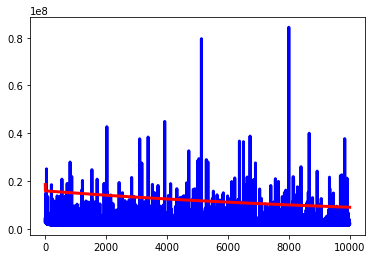

In [13]:
import matplotlib.pyplot as plt
erroSGD = np.load("erroSGD.npy")
erroSGDNormalizado = np.load("erroSGDNormalizado.npy")
plt.plot(np.arange(10000), erroSGD, color='blue', linewidth=3)
plt.plot(np.arange(10000), erroSGDNormalizado, color='red', linewidth=3)
plt.xticks()
plt.yticks()

plt.show()